In [19]:
# run my code
%run megatron_ak.ipynb

### Read in Data

In [35]:
datadir = '../../preprocess/kleinlab/output_subset/'
cellid_to_idx, cloneid_to_idx, clonegrouping_spmtx, coords_mtx, time_vec = readin(datadir)

Number of cells:  3221
Number of clones:  365
Number of dimensions:  2
Time Steps:  [2. 4. 6.]


In [36]:
print(clonegrouping_spmtx.shape)

(3221, 365)


## Trials

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
df_truth = pd.read_csv(os.path.join(datadir,'./clones_truth.tsv.gz'),sep='\t',index_col=0)
#linkage_options = ['complete', 'ward', 'average', 'weighted', 'centroid', 'median']
linkage_options = ['ward']
cluster_options = ['maxclust']

### Wasserstein Trials

In [7]:
dist_options = ['wasserstein', 'energy']

wass_score_dict = {}
for do in dist_options:
    condensed_dist_mat = getdistance_wasserstein(clonegrouping_spmtx, coords_mtx, time_vec, choice=do)
    for lo in linkage_options:
        Z = linkage(condensed_dist_mat, lo)
        for co in cluster_options:
            clone_clusters = fcluster(Z, 5, criterion=co)
            score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
            wass_score_dict[(do, lo, co)]=score

Out of 66430 clonal distances, 0 are noninformative
Out of 66430 clonal distances, 0 are noninformative


In [10]:
listofTuples = sorted(wass_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples :
    print(elem[0] , "\t\t" , elem[1] )

('energy', 'ward', 'maxclust') 		 0.7899530119959177
('wasserstein', 'ward', 'maxclust') 		 0.7885719124781362
('wasserstein', 'median', 'maxclust') 		 0.7616486910947495
('energy', 'average', 'maxclust') 		 0.7502881477816572
('energy', 'weighted', 'maxclust') 		 0.7412519902286092
('wasserstein', 'centroid', 'maxclust') 		 0.7294044632136572
('energy', 'complete', 'maxclust') 		 0.7289260391327324
('wasserstein', 'average', 'maxclust') 		 0.7105797278643441
('wasserstein', 'complete', 'maxclust') 		 0.6990144268531757
('wasserstein', 'weighted', 'maxclust') 		 0.5355769532850246
('energy', 'median', 'maxclust') 		 0.5007467235162486
('energy', 'centroid', 'maxclust') 		 0.47804527941231256
('energy', 'single', 'maxclust') 		 0.18600624102198973
('wasserstein', 'single', 'maxclust') 		 -0.0034818974557002946


### MNN Trials - Radius Graph

In [6]:
# run my code
%run megatron_ak.ipynb
r_options = [x for x in range(100, 680, 80)]
mode_options = ["connectivity"]

mnn_r_score_dict = {}
for ro in r_options:
    for mo in mode_options:
        condensed_dist_mat = getdistance_mnn(
        clonegrouping_spmtx, coords_mtx, time_vec, 
        dist="radius", radius=ro, mode=mo)
        for lo in linkage_options:
            Z = linkage(condensed_dist_mat, lo)
            for co in cluster_options:
                clone_clusters = fcluster(Z, 5, criterion=co)
                score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
                mnn_r_score_dict[(ro, mo, lo, co)]=score
                print((ro, mo, lo, co), "\t", score)

(100, 'connectivity', 'ward', 'maxclust') 	 0.6983802722641169
(180, 'connectivity', 'ward', 'maxclust') 	 0.7152773944305221
(260, 'connectivity', 'ward', 'maxclust') 	 0.7583757410633778
(340, 'connectivity', 'ward', 'maxclust') 	 0.9070843003800416
(420, 'connectivity', 'ward', 'maxclust') 	 0.846665223326829
(500, 'connectivity', 'ward', 'maxclust') 	 0.8729973785787705
(580, 'connectivity', 'ward', 'maxclust') 	 0.8394465963483634
(660, 'connectivity', 'ward', 'maxclust') 	 0.8809101336139483


In [7]:
listofTuples_rad = sorted(mnn_r_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples_rad:
    print(elem[0] , "\t\t" , elem[1] )

(340, 'connectivity', 'ward', 'maxclust') 		 0.9070843003800416
(660, 'connectivity', 'ward', 'maxclust') 		 0.8809101336139483
(500, 'connectivity', 'ward', 'maxclust') 		 0.8729973785787705
(420, 'connectivity', 'ward', 'maxclust') 		 0.846665223326829
(580, 'connectivity', 'ward', 'maxclust') 		 0.8394465963483634
(260, 'connectivity', 'ward', 'maxclust') 		 0.7583757410633778
(180, 'connectivity', 'ward', 'maxclust') 		 0.7152773944305221
(100, 'connectivity', 'ward', 'maxclust') 		 0.6983802722641169


### MNN Trials - KNN Graph

In [8]:
%run megatron_ak.ipynb
k_options = [x for x in range(100, 500, 50)]
mode_options = ["connectivity"]
#mode_options = ["connectivity"]
mnn_k_score_dict = {}
for ko in k_options:
    for mo in mode_options:
        condensed_dist_mat = getdistance_mnn(
            clonegrouping_spmtx, coords_mtx, time_vec, 
            dist="kneighbors", neighbors=ko, mode=mo)
        for lo in linkage_options:
            Z = linkage(condensed_dist_mat, lo)
            for co in cluster_options:
                clone_clusters = fcluster(Z, 5, criterion=co)
                score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
                mnn_k_score_dict[(ko, mo, lo, co)]=score
                print((ko,mo,lo,co),"\t",score)

(100, 'connectivity', 'ward', 'maxclust') 	 0.8331265862841414
(150, 'connectivity', 'ward', 'maxclust') 	 0.809453276355465
(200, 'connectivity', 'ward', 'maxclust') 	 0.8173340509077278
(250, 'connectivity', 'ward', 'maxclust') 	 0.9135823276235024
(300, 'connectivity', 'ward', 'maxclust') 	 0.9382233607369764
(350, 'connectivity', 'ward', 'maxclust') 	 0.9323994083061685
(400, 'connectivity', 'ward', 'maxclust') 	 0.8718427120930285
(450, 'connectivity', 'ward', 'maxclust') 	 0.8614446201036329


In [9]:
listofTuples_knn = sorted(mnn_k_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples_knn:
    print(elem[0] , "\t\t" , elem[1] )

(300, 'connectivity', 'ward', 'maxclust') 		 0.9382233607369764
(350, 'connectivity', 'ward', 'maxclust') 		 0.9323994083061685
(250, 'connectivity', 'ward', 'maxclust') 		 0.9135823276235024
(400, 'connectivity', 'ward', 'maxclust') 		 0.8718427120930285
(450, 'connectivity', 'ward', 'maxclust') 		 0.8614446201036329
(100, 'connectivity', 'ward', 'maxclust') 		 0.8331265862841414
(200, 'connectivity', 'ward', 'maxclust') 		 0.8173340509077278
(150, 'connectivity', 'ward', 'maxclust') 		 0.809453276355465


## Visualize Best KNN

In [12]:
condensed_dist_mat = getdistance_mnn(
    clonegrouping_spmtx, coords_mtx, time_vec, 
            dist="kneighbors", neighbors=300, mode='connectivity')
Z = linkage(condensed_dist_mat, 'ward')
clone_clusters = fcluster(Z, 5, criterion='maxclust')

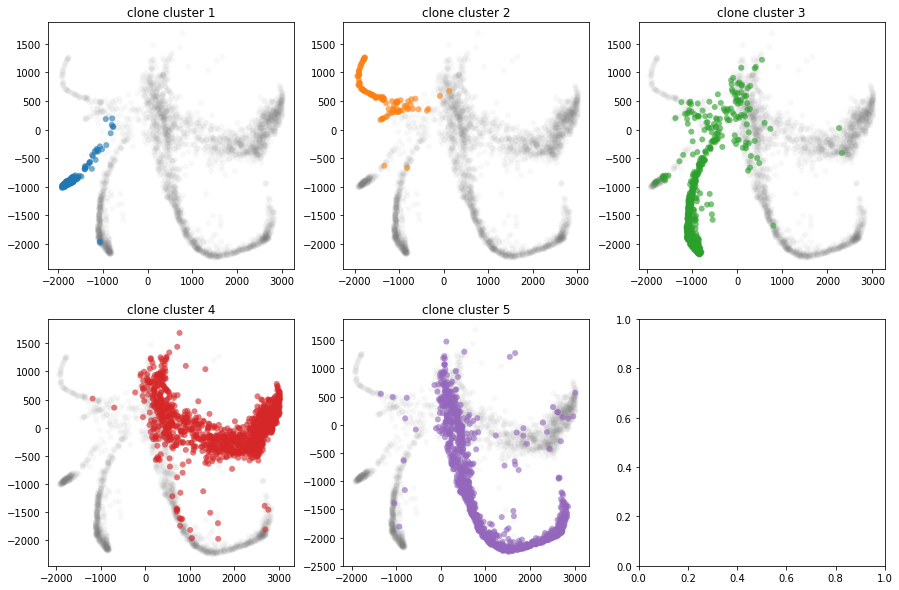

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_metadata = pd.read_csv(os.path.join(datadir,'metadata.tsv.gz'),sep='\t',index_col=0)
df_coord = pd.read_csv(os.path.join(datadir,'coordinates.tsv.gz'),sep='\t',index_col=0)
df_clones = pd.read_csv(os.path.join(datadir,'clones.tsv.gz'),sep='\t',index_col=0)
df_clones = df_clones[df_clones.columns[df_clones.sum(axis=0)>0]]


df_clones_clusters = pd.Series(data=clone_clusters,index=df_clones.columns)
n_col = 3
n_row = int(np.ceil(len(np.unique(clone_clusters))/n_col))
colormap = sns.color_palette().as_hex()

fig, axs = plt.subplots(n_row,n_col,figsize=(5*n_col, 5*n_row))
for i,x in enumerate(np.unique(clone_clusters)):
    clone_cluster_i = df_coord.loc[df_clones.index[df_clones[df_clones_clusters.index[df_clones_clusters==x]].sum(axis=1)>0]]
    axs[int(np.floor(i/n_col)),i%n_col].scatter(df_coord['0'], df_coord['1'],
                                                c='gray',alpha=0.05,edgecolors='none')
    axs[int(np.floor(i/n_col)),i%n_col].scatter(clone_cluster_i['0'], clone_cluster_i['1'],
                                                c=colormap[i],edgecolors='none',alpha=0.6)
    axs[int(np.floor(i/n_col)),i%n_col].set_title('clone cluster '+str(x))

## Visualize Relationship between Score and num_neighbors

In [14]:
%run megatron_ak.ipynb
x_numneighbors = []
y_score = []
k_options = [x for x in range(10, 500, 10)]
mode_options = ["connectivity"]
#mode_options = ["connectivity"]
mnn_k_score_dict = {}
for ko in k_options:
    condensed_dist_mat = getdistance_mnn(
            clonegrouping_spmtx, coords_mtx, time_vec, 
            dist="kneighbors", neighbors=ko, mode=mo)
    Z = linkage(condensed_dist_mat, lo)
    clone_clusters = fcluster(Z, 5, criterion=co)
    score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
    x_numneighbors.append(ko)
    y_score.append(score)
    print(ko)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


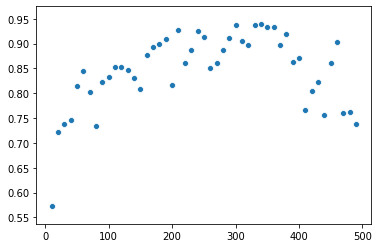

In [15]:
sns.scatterplot(x=x_numneighbors,y=y_score)

## Visualize KNN Score on Morris Lab re-embeddings a la Emily

In [53]:
datadir = '../../preprocess/morrislab/output'

In [54]:
df_metadata = pd.read_csv(os.path.join(datadir,'metadata.tsv.gz'),sep='\t',index_col=0)
print(df_metadata.shape)
df_metadata.head()

(4498, 8)


,nGene,nUMI,CellCycle,percent.mito,Replicate,time,Timepoint,Reprogramming.Day
HF1.CCTAGCTTCCAAATGC-4,5039,2982.0,G2M,8.14,HF1,9,Day 9,9
HF1.CGCTTCACACTTACGA-4,4828,2552.0,G1,7.69,HF1,9,Day 9,9
HF1.GTAGTCATCGTATCAG-4,3281,2744.0,G1,9.47,HF1,9,Day 9,9
HF1.AAATGCCTCTAACTGG-5,4907,2707.0,G1,7.57,HF1,12,Day 12,12
HF1.AAGACCTTCCTCTAGC-5,3487,2703.0,G1,8.80,HF1,12,Day 12,12


In [55]:
df_coord_tsne = pd.read_csv(os.path.join(datadir,'coordinates_tsne.tsv'),sep=',',index_col=0)
print(df_coord_tsne.shape)
df_coord_tsne.head()

(4498, 2)


,tSNE_1,tSNE_2
HF1.CCTAGCTTCCAAATGC-4,-16.265850,21.836313
HF1.CGCTTCACACTTACGA-4,1.913499,24.135532
HF1.GTAGTCATCGTATCAG-4,9.708149,7.291124
HF1.AAATGCCTCTAACTGG-5,-13.589550,19.088638
HF1.AAGACCTTCCTCTAGC-5,5.662020,-3.875032


In [56]:
df_coord_umap = pd.read_csv(os.path.join(datadir,'coordinates_umap.tsv'),sep=',',index_col=0)
print(df_coord_umap.shape)
df_coord_umap.head()

(4498, 2)


,UMAP_1,UMAP_2
HF1.CCTAGCTTCCAAATGC-4,0.655061,-6.913223
HF1.CGCTTCACACTTACGA-4,-2.038253,-4.753137
HF1.GTAGTCATCGTATCAG-4,-1.760838,-1.514237
HF1.AAATGCCTCTAACTGG-5,0.296289,-5.786811
HF1.AAGACCTTCCTCTAGC-5,0.212569,-1.547694


In [57]:
df_coord_pca = pd.read_csv(os.path.join(datadir,'coordinates_pca.tsv'),sep=',',index_col=0)
print(df_coord_pca.shape)
df_coord_pca.head()

(4498, 2)


,PC_1,PC_2
HF1.CCTAGCTTCCAAATGC-4,-5.933861,3.215821
HF1.CGCTTCACACTTACGA-4,-4.214756,11.640756
HF1.GTAGTCATCGTATCAG-4,3.093281,0.979488
HF1.AAATGCCTCTAACTGG-5,-6.345111,3.994762
HF1.AAGACCTTCCTCTAGC-5,-0.894470,-4.513346


In [71]:
df_clones = pd.read_csv(os.path.join(datadir,'clones.tsv.gz'),sep='\t',index_col=0)
print(df_clones.shape)
df_clones.head()

(4498, 781)


,"(-1, 97, 75)","(-1, 343, 71)","(-1, 343, 257)","(-1, 357, 19)","(-1, 486, 159)","(-1, 516, 97)","(-1, 522, 32)","(-1, 593, 251)","(-1, 629, 59)","(-1, 766, 108)",...,"(3023, 2052, -1)","(3026, -1, 2068)","(3026, -1, 2101)","(3026, -1, 2160)","(3026, -1, 2283)","(3026, -1, 2288)","(3035, 2281, -1)","(3036, 2513, -1)","(3036, 2651, -1)","(3036, 2656, -1)"
HF1.CCTAGCTTCCAAATGC-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.CGCTTCACACTTACGA-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.GTAGTCATCGTATCAG-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.AAATGCCTCTAACTGG-5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.AAGACCTTCCTCTAGC-5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_clones = df_clones[df_clones.columns[df_clones.sum(axis=0)>20]]
print(df_clones.shape)
df_clones.head()

(4498, 236)


,"(-1, 486, 159)","(-1, 2105, 2051)","(-1, 2105, 2052)","(-1, 2105, 2201)","(-1, 2281, 2025)","(-1, 2281, 2026)","(-1, 2281, 2040)","(-1, 2281, 2050)","(-1, 2281, 2055)","(-1, 2281, 2071)",...,"(2641, 2418, -1)","(2695, 2281, -1)","(2695, 2281, 2025)","(2695, 2281, 2095)","(2695, 2281, 2174)","(2695, 2281, 2276)","(2721, -1, 2075)","(2721, -1, 2212)","(2721, 2024, -1)","(2764, 2525, -1)"
HF1.CCTAGCTTCCAAATGC-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.CGCTTCACACTTACGA-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.GTAGTCATCGTATCAG-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.AAATGCCTCTAACTGG-5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HF1.AAGACCTTCCTCTAGC-5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
clonegrouping_spmtx = sps.csc_matrix(df_clones.to_numpy())
print(clonegrouping_spmtx.shape)

(4498, 236)


### PCA

In [79]:
%run megatron_ak.ipynb
condensed_dist_mat = getdistance_mnn(
    clonegrouping_spmtx, 
    df_coord_pca.to_numpy(), 
    df_metadata['time'].to_numpy(), 
    dist="kneighbors", 
    neighbors=300, 
    mode='connectivity')
Z = linkage(condensed_dist_mat, 'ward')
clone_clusters = fcluster(Z, 5, criterion='maxclust')

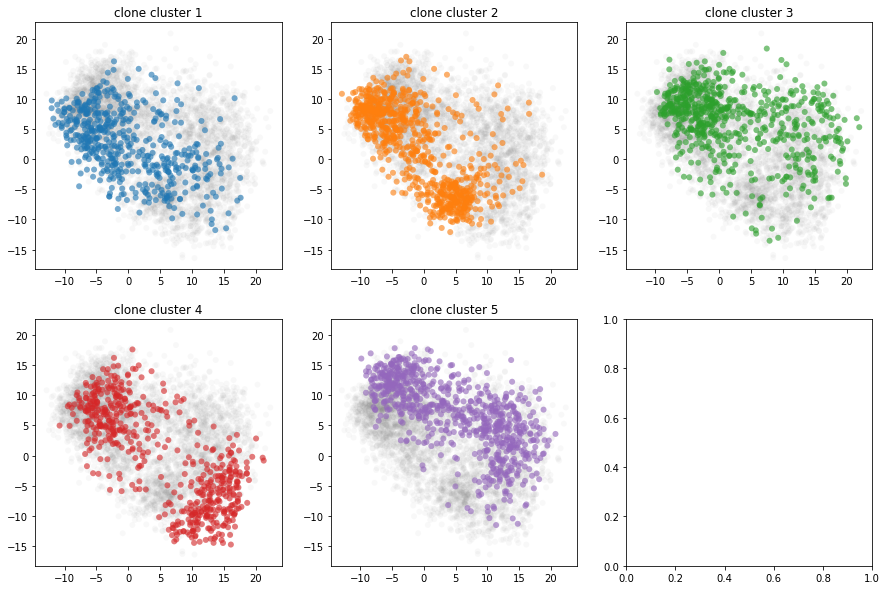

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clones_clusters = pd.Series(data=clone_clusters,index=df_clones.columns)
n_col = 3
n_row = int(np.ceil(len(np.unique(clone_clusters))/n_col))
colormap = sns.color_palette().as_hex()

fig, axs = plt.subplots(n_row,n_col,figsize=(5*n_col, 5*n_row))
for i,x in enumerate(np.unique(clone_clusters)):
    clone_cluster_i = df_coord_pca.loc[df_clones.index[df_clones[df_clones_clusters.index[df_clones_clusters==x]].sum(axis=1)>0]]
    #print(clone_cluster_i)
    axs[int(np.floor(i/n_col)),i%n_col].scatter(df_coord_pca['PC_1'], df_coord_pca['PC_2'],
                                                c='gray',alpha=0.05,edgecolors='none')
    axs[int(np.floor(i/n_col)),i%n_col].scatter(clone_cluster_i['PC_1'], clone_cluster_i['PC_2'],
                                                c=colormap[i],edgecolors='none',alpha=0.6)
    axs[int(np.floor(i/n_col)),i%n_col].set_title('clone cluster '+str(x))

### UMAP

In [85]:
condensed_dist_mat = getdistance_mnn(
    clonegrouping_spmtx, 
    df_coord_umap.to_numpy(), 
    df_metadata['time'].to_numpy(), 
    dist="kneighbors", 
    neighbors=300, 
    mode='connectivity')
Z = linkage(condensed_dist_mat, 'ward')
clone_clusters = fcluster(Z, 5, criterion='maxclust')

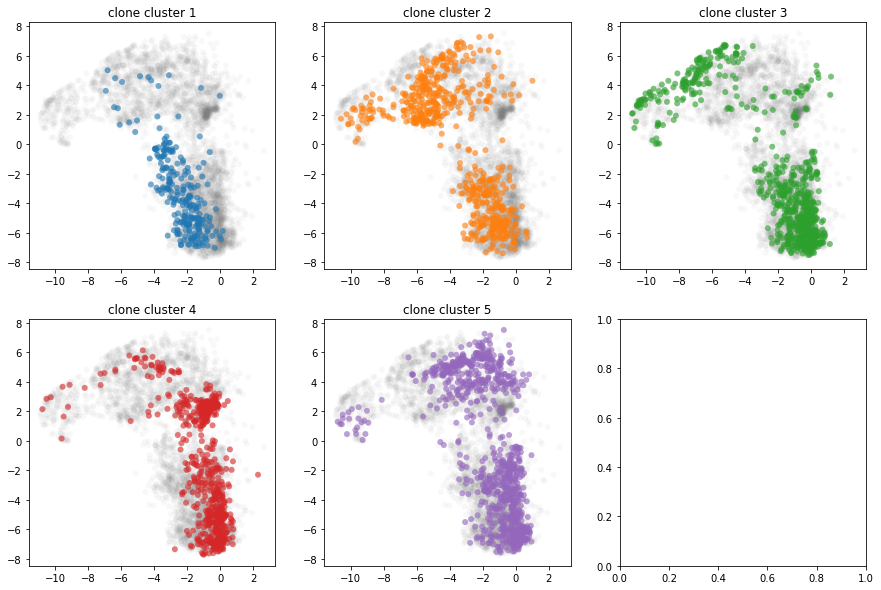

In [86]:
df_clones_clusters = pd.Series(data=clone_clusters,index=df_clones.columns)
n_col = 3
n_row = int(np.ceil(len(np.unique(clone_clusters))/n_col))
colormap = sns.color_palette().as_hex()

fig, axs = plt.subplots(n_row,n_col,figsize=(5*n_col, 5*n_row))
for i,x in enumerate(np.unique(clone_clusters)):
    clone_cluster_i = df_coord_umap.loc[df_clones.index[df_clones[df_clones_clusters.index[df_clones_clusters==x]].sum(axis=1)>0]]
    axs[int(np.floor(i/n_col)),i%n_col].scatter(df_coord_umap['UMAP_1'], df_coord_umap['UMAP_2'],
                                                c='gray',alpha=0.05,edgecolors='none')
    axs[int(np.floor(i/n_col)),i%n_col].scatter(clone_cluster_i['UMAP_1'], clone_cluster_i['UMAP_2'],
                                                c=colormap[i],edgecolors='none',alpha=0.6)
    axs[int(np.floor(i/n_col)),i%n_col].set_title('clone cluster '+str(x))

## tSNE

In [87]:
condensed_dist_mat = getdistance_mnn(
    clonegrouping_spmtx, 
    df_coord_tsne.to_numpy(), 
    df_metadata['time'].to_numpy(), 
    dist="kneighbors", 
    neighbors=300, 
    mode='connectivity')
Z = linkage(condensed_dist_mat, 'ward')
clone_clusters = fcluster(Z, 5, criterion='maxclust')

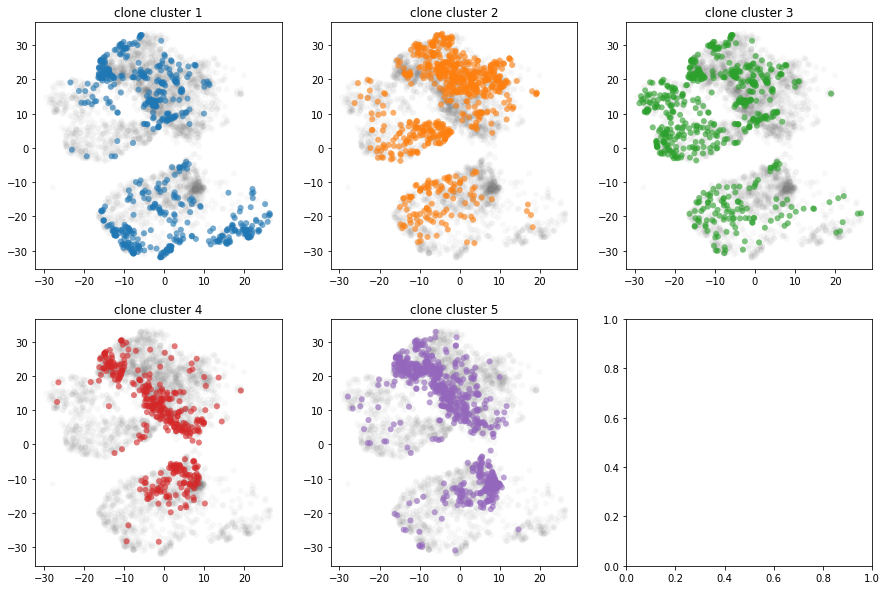

In [88]:
df_clones_clusters = pd.Series(data=clone_clusters,index=df_clones.columns)
n_col = 3
n_row = int(np.ceil(len(np.unique(clone_clusters))/n_col))
colormap = sns.color_palette().as_hex()

fig, axs = plt.subplots(n_row,n_col,figsize=(5*n_col, 5*n_row))
for i,x in enumerate(np.unique(clone_clusters)):
    clone_cluster_i = df_coord_tsne.loc[df_clones.index[df_clones[df_clones_clusters.index[df_clones_clusters==x]].sum(axis=1)>0]]
    axs[int(np.floor(i/n_col)),i%n_col].scatter(df_coord_tsne['tSNE_1'], df_coord_tsne['tSNE_2'],
                                                c='gray',alpha=0.05,edgecolors='none')
    axs[int(np.floor(i/n_col)),i%n_col].scatter(clone_cluster_i['tSNE_1'], clone_cluster_i['tSNE_2'],
                                                c=colormap[i],edgecolors='none',alpha=0.6)
    axs[int(np.floor(i/n_col)),i%n_col].set_title('clone cluster '+str(x))

# Visualization Work

In [6]:
%run visualizations.ipynb

In [5]:
datadir = '../../preprocess/kleinlab/output_subset/'

df_metadata = pd.read_csv(os.path.join(datadir,'metadata.tsv.gz'),sep='\t',index_col=0)
df_coord = pd.read_csv(os.path.join(datadir,'coordinates.tsv.gz'),sep='\t',index_col=0)
df_clones = pd.read_csv(os.path.join(datadir,'clones.tsv.gz'),sep='\t',index_col=0)
df_clones = df_clones[df_clones.columns[df_clones.sum(axis=0)>0]]
clonegrouping_spmtx = sps.csc_matrix(df_clones.to_numpy())

#cellid_to_idx, cloneid_to_idx, clonegrouping_spmtx, coords_mtx, time_vec = readin(datadir)

condensed_dist_mat = getdistance_mnn(
    clonegrouping_spmtx,
    df_coord.to_numpy(),
    df_metadata['time'].to_numpy(), 
    dist="kneighbors", 
    neighbors=300, 
    mode='connectivity'
)

Z = linkage(condensed_dist_mat, 'ward')

In [6]:
full_viz(
    Z,
    df_coord,
    df_clones
)

interactive(children=(IntSlider(value=4, description='num_clusters', max=30, min=4), Button(description='Run I…

## Run on Carlin data

In [7]:
datadir = '../../preprocess/camargolab/output_fig6'
df_metadata = pd.read_csv(os.path.join(datadir,'metadata.tsv.gz'),sep='\t',index_col=0)
df_coord = pd.read_csv(os.path.join(datadir,'coordinates.tsv.gz'),sep='\t',index_col=0)
df_clones = pd.read_csv(os.path.join(datadir,'clones_mice.tsv.gz'),sep='\t',index_col=0)
df_clones = df_clones[df_clones.columns[df_clones.sum(axis=0)>0]]
clonegrouping_spmtx = sps.csc_matrix(df_clones.to_numpy())
condensed_dist_mat = getdistance_wasserstein(
    clonegrouping_spmtx, 
    df_coord.to_numpy(),
    df_metadata['time'].to_numpy(), 
    choice='energy')
Z = linkage(condensed_dist_mat, 'ward')
full_viz(
    Z,
    df_coord,
    df_clones
)

interactive(children=(IntSlider(value=1, description='Meta-clones: ', max=30, min=1), Button(description='Run …

In [29]:
len(Z)
df_clones
len(Z)

1979

In [14]:
import pickle
pickle.dump( Z, open( "carlin_z.p", "wb" ) )

## Multidim Wass Dist

In [28]:
%run megatron_ak.ipynb
datadir = '../../preprocess/kleinlab/output_subset/'
cellid_to_idx, cloneid_to_idx, clonegrouping_spmtx, coords_mtx, time_vec = readin(datadir)
condensed_dist_mat = getdistance_sinkhorn(clonegrouping_spmtx, coords_mtx, time_vec)

Number of cells:  3221
Number of clones:  365
Number of dimensions:  2
Time Steps:  [2. 4. 6.]


KeyboardInterrupt: 

In [ ]:
Z = linkage(condensed_dist_mat, lo)
clone_clusters = fcluster(Z, 5, criterion=co)
df_truth = pd.read_csv(os.path.join(datadir,'./clones_truth.tsv.gz'),sep='\t',index_col=0)
score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
print(score)